In [1]:
import sys

print (sys.version)

from tensorflow.python.client import device_lib

def get_available_devices():  
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())  

3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609]
['/cpu:0', '/gpu:0']


In [2]:
import numpy as np

import pandas as pd

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
# %matplotlib notebook

import matplotlib as mpl

import matplotlib.pyplot as plt

from pprint import pprint

In [3]:
# sample dataset (20K malicious URLs and 20K benign URLs)
# from https://github.com/albahnsen/ML_SecurityInformatics/blob/master/datasets/phishing.csv.zip

df = pd.read_csv('phishing.csv.gz', compression='gzip')

df.head(10)

,url,phishing
0,http://www.subalipack.com/contact/images/sampl...,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1
2,http://theotheragency.com/confirmer/confirmer-...,1
3,http://aaalandscaping.com/components/com_smart...,1
4,http://paypal.com.confirm-key-21107316126168.s...,1
5,http://lcthomasdeiriarte.edu.co/plugins/system...,1
6,http://livetoshare.org/open/service-apps.com.c...,1
7,http://www.i-m.co/reactivate/webupgrade/\n,1
8,http://manuelfernando.co/sparkatse/index.htm\n,1
9,http://www.bladesmithnews.com/confirmation-pay...,1


In [4]:
df.phishing.value_counts()

1    20000
0    20000
Name: phishing, dtype: int64

In [5]:
# remove line breaks
df['url2'] = df.url.str.rstrip()

pprint(df.url2[df.phishing == 1].sample(20, random_state=1).tolist())

['http://dothan.com.co/gold/austspark/index.htm',
 'http://78.142.63.63/%7Enetsysco/process/fc1d9c7ea4773b7ff90925c2902cb5f2',
 'http://verify95.5gbfree.com/coverme2010/',
 'http://www.racom.com/uploads/productscat/bookmark/ii.php?.rand=13vqcr8bp0gud&cbcxt=mai&email=abuse@tradinghouse.ca',
 'http://www.cleanenergytci.com/components/update.logon.l3an7lofamerica/2342343234532534546347677898765432876543345687656543876/',
 'http://209.148.89.163/-/santander.co.uk/weblegn/AccountLogin.php',
 'http://senevi.com/confirmation/',
 'http://www.hellenkeller.cl/tmp/new/noticias/Modulo_de_Atualizacao_Bradesco/index2.php?id=PSO1AM04L3Q6PSBNVJ82QUCO0L5GBSY2KM2U9BYUEO14HCRDVZEMTRB3DGJO9HPT4ROC4M8HA8LRJD5FCJ27AD0NTSC3A3VDUJQX6XFG519OED4RW6Y8J8VC19EAAAO5UF21CHGHIP7W4AO1GM8ZU4BUBQ6L2UQVARVM',
 'http://internet-sicherheit.co/de/konflikt/src%3Dde/AZ00276ZZ75/we%3Dhs_0_2/sicherheit/konto_verifizieren/verifizierung.php',
 'http://alen.co/docs/cleaner',
 'http://rattanhouse.co/Atualizacao_Bradesco/cadastro201

In [6]:
# find the maximum length of all URLs

urls = list(df.url2)

max_len = 0

for url in urls:
  if (len(url) > max_len):
    max_len = len(url)

print('maximum length: %s '%max_len)


# calculate the average length of URLs

numChars = []

for url in urls:
  numChars.append(len(url))

print('average length: %s'%(sum(numChars) / len(numChars)))

maximum length: 2080 
average length: 92.717225


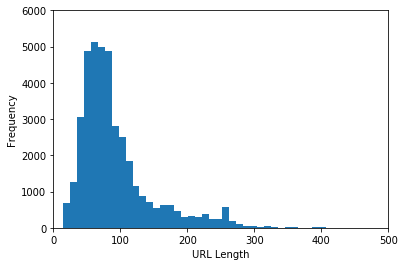

In [7]:
# draw length distribution diagram

plt.hist(numChars, 200)
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.axis([0, 500, 0, 6000])
plt.show()

In [8]:
# find maximum lengths and calcuate average lengths

df_B = df[df.phishing == 0]
df_P = df[df.phishing == 1]

urls_B = list(df_B.url2)
urls_P = list(df_P.url2)


max_len_B = 0

for url in urls_B:
  if (len(url) > max_len_B):
    max_len_B = len(url)

print('maximum length of benign URLs: %s '%max_len_B)


numChars_B = []

for url in urls_B:
  numChars_B.append(len(url))

print('average length of benign URLs: %s'%(sum(numChars_B) / len(numChars_B)))


max_len_P = 0

for url in urls_P:
  if (len(url) > max_len_P):
    max_len_P = len(url)

print('maximum length of phishing URLs: %s '%max_len_P)


numChars_P = []

for url in urls_P:
  numChars_P.append(len(url))

print('average length of phishing URLs: %s'%(sum(numChars_P) / len(numChars_P)))

maximum length of benign URLs: 1108 
average length of benign URLs: 84.28035
maximum length of phishing URLs: 2080 
average length of phishing URLs: 101.1541


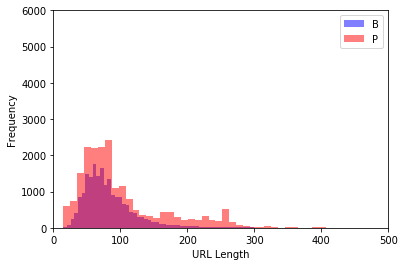

In [9]:
# draw length distribution diagrams

plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.axis([0, 500, 0, 6000])

plt.hist(numChars_B, 200, alpha=0.5, label='B', color='b')
plt.hist(numChars_P, 200, alpha=0.5, label='P', color='r')
plt.legend(loc='upper right')
plt.show()

In [10]:
charsList = [list(url) for url in urls]

from collections import defaultdict

frequency = defaultdict(int)

for chars in charsList:
  for char in chars:
    frequency[char] += 1

print('totally %s characters found.'%(len(frequency)))

totally 98 characters found.


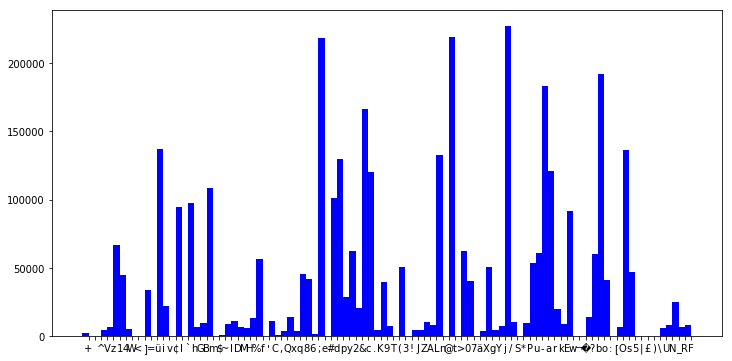

In [12]:
chars = frequency.keys()
freqs = frequency.values()

pos = np.arange(len(chars))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(chars)

plt.bar(pos, freqs, width, color='b')
# mpl.rcParams["figure.figsize"] = (12.0, 6.0)
plt.rcParams["figure.figsize"] = [12.0, 6.0]
plt.show()

In [13]:
# find rare character list

frequency2 = defaultdict(int)

for char, count in frequency.items():
  if (count < 5):
    frequency2[char] = count

print('totally %s characters with occurrence less than 5.'%(len(frequency2)))

for k, v in frequency2.items():
    print('%s : %s'%(k,v))

totally 6 characters with occurrence less than 5.
\ : 1
ü : 1
> : 1
ä : 1
£ : 4
¢ : 4


In [14]:
# convert character into index using index dictionary

dictionary = defaultdict(int)

id = 0

for char, count in frequency.items():
  dictionary[char] = id
  id += 1

corpus = [[dictionary[char] for char in chars] for chars in charsList]

In [15]:
Y = list(df.phishing)

from sklearn.model_selection import train_test_split

corpus_train, corpus_test, Y_train, Y_test = train_test_split(corpus, Y, test_size=0.2, random_state=42)

In [16]:
import pickle

pickle.dump(corpus_train, open( "corpus_train.pkl", "wb" ))
pickle.dump(corpus_test, open( "corpus_test.pkl", "wb" ))
pickle.dump(Y_train, open( "Y_train.pkl", "wb" ))
pickle.dump(Y_test, open( "Y_test.pkl", "wb" ))

In [2]:
# start from here during next runs, to skip data pre-processing steps

import pickle

corpus_train = pickle.load( open( "corpus_train.pkl", "rb" ) )
corpus_test = pickle.load( open( "corpus_test.pkl", "rb" ) )
Y_train = pickle.load( open( "Y_train.pkl", "rb" ) )
Y_test = pickle.load( open( "Y_test.pkl", "rb" ) )

In [17]:
import tensorflow as tf

import tflearn

# on g2.2xlarge (1 GPU, 8 vCPUs, 15 GiB memory)

tflearn.init_graph(num_cores=8, gpu_memory_fraction=0.8, soft_placement=True)

intra_op_parallelism_threads: 8
inter_op_parallelism_threads: 8
gpu_options {
  per_process_gpu_memory_fraction: 0.8
}
allow_soft_placement: true

In [18]:
from tflearn.data_utils import to_categorical, pad_sequences

trainX_ = pad_sequences(corpus_train, maxlen=200, value=98)
testX_ = pad_sequences(corpus_test, maxlen=200, value=98)

trainY_ = to_categorical(Y_train, nb_classes=2)
testY_ = to_categorical(Y_test, nb_classes=2)

trainX, trainY = tflearn.data_utils.shuffle(trainX_, trainY_)
testX, testY = tflearn.data_utils.shuffle(testX_, testY_)

In [20]:
# comment it out at the first run
tf.reset_default_graph()

net = tflearn.input_data(shape=[None, 200])

def build_network(network):
  network = tflearn.embedding(network, input_dim=99, output_dim=32)
  network = tflearn.lstm(network, 128, dropout=0.8)
  network = tflearn.fully_connected(network, 2, activation='softmax')
  network = tflearn.regression(network, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')
  return network

net = build_network(net)

model = tflearn.DNN(net, tensorboard_verbose=0)

In [ ]:
accuracies_train = []
accuracies_test = []

for i in range(60):
  model.fit(trainX, trainY, validation_set=(testX, testY), shuffle=True, show_metric=True, n_epoch=1, batch_size=32)
  model.save("lstm%s.tfl"%(i+1))
  accuracies_train.append(model.evaluate(trainX_, trainY_))
  accuracies_test.append(model.evaluate(testX_, testY_))

Training Step: 29428  | total loss: 0.00433 | time: 64.261s
| Adam | epoch: 030 | loss: 0.00433 - acc: 0.9986 -- iter: 13696/32000


In [22]:
max_accuracy = 0.0
idx_at_max = 0

for idx, accuracy in enumerate(accuracies_test):
    print('At epoch %d, the accuracy of train data is %s, the accuracy of test data is %s'%((idx+1), accuracies_train[idx][0], accuracy[0]))
    if (accuracy[0] > max_accuracy):
        max_accuracy = accuracy[0]
        idx_at_max = idx

print('At epoch %d, the maximum accuracy of test data is %s'%((idx_at_max+1), max_accuracy))

At epoch 1, the accuracy of train data is 0.663375, the accuracy of test data is 0.66175
At epoch 2, the accuracy of train data is 0.8680625, the accuracy of test data is 0.870625
At epoch 3, the accuracy of train data is 0.93315625, the accuracy of test data is 0.934375
At epoch 4, the accuracy of train data is 0.952125, the accuracy of test data is 0.949375
At epoch 5, the accuracy of train data is 0.97246875, the accuracy of test data is 0.970125
At epoch 6, the accuracy of train data is 0.98128125, the accuracy of test data is 0.97825
At epoch 7, the accuracy of train data is 0.985, the accuracy of test data is 0.980875
At epoch 8, the accuracy of train data is 0.9865625, the accuracy of test data is 0.9845
At epoch 9, the accuracy of train data is 0.98909375, the accuracy of test data is 0.986875
At epoch 10, the accuracy of train data is 0.99078125, the accuracy of test data is 0.988875
At epoch 11, the accuracy of train data is 0.99234375, the accuracy of test data is 0.9875
At 

In [23]:
# load the model with the highest accuracy if the last one does not give the highest accuracy

model.load('lstm55.tfl')

INFO:tensorflow:Restoring parameters from /home/ubuntu/phishing-urls/notebook-lstm/lstm55.tfl


In [24]:
accuracy_train = model.evaluate(trainX_, trainY_)[0]

print('The accuracy of train data is %s'%('{percent:.2%}'.format(percent=accuracy_train)))

accuracy_test = model.evaluate(testX_, testY_)[0]

print('The accuracy of test data is %s'%('{percent:.2%}'.format(percent=accuracy_test)))

The accuracy of train data is 99.96%
The accuracy of test data is 99.39%


In [25]:
null_accuracy = max(testY_.mean(), (1 - testY_.mean()))

print('null accuracy is %s'%('{percent:.2%}'.format(percent= null_accuracy)))

null accuracy is 50.00%


In [26]:
import numpy as np

predict_labels = np.zeros(len(testX_))

batch_size = 100
batches = len(testX_) // batch_size

for i in range(batches):
    start = i * batch_size
    end = (i+1) * batch_size
    pred = model.predict_label(testX_[start:end])
    for j in range(batch_size):
        predict_labels[start + j] = pred[j][0]

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predict_labels)

print('true negatives: %s'%cm[0,0])
print('false negatives: %s'%cm[1,0])
print('true positives: %s'%cm[1,1])
print('false positives: %s'%cm[0,1])

fpr = '{percent:.3%}'.format(percent= cm[0,1] / (cm[1,1] + cm[0,1]))
fnr = '{percent:.3%}'.format(percent= cm[1,0] / (cm[0,0] + cm[1,0]))
                             
print('false postive rate: %s'%fpr)
print('false negative rate: %s'%fnr)

true negatives: 3961
false negatives: 24
true positives: 3990
false positives: 25
false postive rate: 0.623%
false negative rate: 0.602%


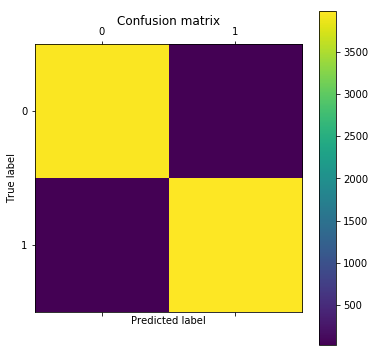

In [28]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
from sklearn.metrics import precision_score

print('precision score: %s'%precision_score(Y_test, predict_labels))


from sklearn.metrics import recall_score

print('recall score: %s'%recall_score(Y_test, predict_labels))


from sklearn.metrics import f1_score

print('f1 score: %s'%f1_score(Y_test, predict_labels))

precision score: 0.993773349938
recall score: 0.994020926756
f1 score: 0.993897122929


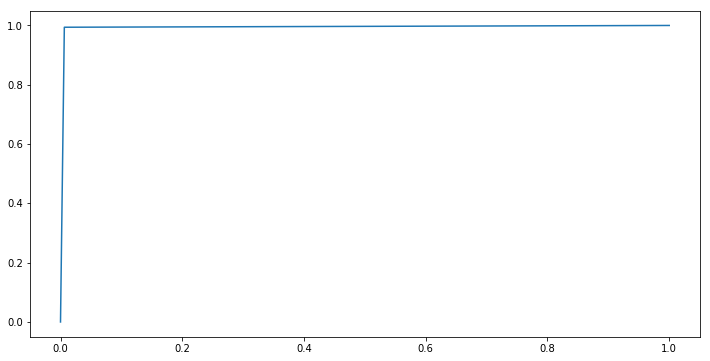

In [30]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predict_labels, pos_label=1)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.show() 